# LA LIGA DATA ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [3]:
with sqlite3.connect("../laliga.sqlite") as con:
    df = pd.read_sql("""SELECT * FROM Matches""", con = con)
	


In [5]:
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


In [6]:
num_valores_none = df["score"].isna().sum()
num_valores_none

780

Taking into account that the number of cells without score is 1.6% we decided to work with another data frame without this values.

In [7]:
df_clean = df.dropna(subset = ["score"]).copy()
df_clean

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0


In [8]:
df_clean[['score_home', 'score_visitor']] = df_clean['score'].str.split(':', expand=True)
df_clean

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2
...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0


In [9]:
df_clean.dtypes

season           object
division          int64
matchday          int64
date             object
time             object
home_team        object
away_team        object
score            object
score_home       object
score_visitor    object
dtype: object

In [10]:
df_clean['score_home'] = pd.to_numeric(df_clean['score_home']).astype(int)
df_clean['score_visitor'] = pd.to_numeric(df_clean['score_visitor']).astype(int)

In [11]:
df_clean.dtypes

season           object
division          int64
matchday          int64
date             object
time             object
home_team        object
away_team        object
score            object
score_home        int32
score_visitor     int32
dtype: object

In [12]:
df_clean['result'] = "None"
df_clean.loc[df_clean['score_home'] > df_clean['score_visitor'], 'result'] = "Home"
df_clean.loc[df_clean['score_home'] < df_clean['score_visitor'], 'result'] = "Visitor"
df_clean.loc[df_clean['score_home'] == df_clean['score_visitor'], 'result'] = "Tie"
df_clean

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,result
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,Visitor
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,Home
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,Home
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,Tie
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,Visitor
...,...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1,Home
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1,Home
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2,Visitor
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0,Tie


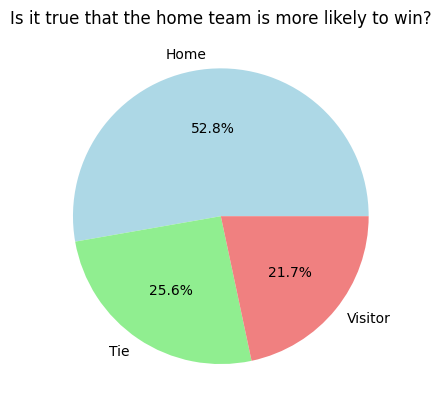

In [13]:
colors = ['lightblue', 'lightgreen', 'lightcoral']
grafico = df_clean['result'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
grafico.set_ylabel('')
grafico.set_title('Is it true that the home team is more likely to win?')
plt.show()

## EJERCICIO2

In [14]:
home_goals = df_clean.loc[df_clean['division'] == 1].groupby('home_team')['score_home'].sum()
away_goals = df_clean.loc[df_clean['division'] == 1].groupby('away_team')['score_visitor'].sum()
total_goals = home_goals.add(away_goals, fill_value=0)
TOP_total_goals = total_goals.sort_values(ascending=False).head(10)

In [15]:
home_goals_conceded = df_clean.loc[df_clean['division'] == 1].groupby('home_team')['score_visitor'].sum()
away_goals_conceded = df_clean.loc[df_clean['division'] == 1].groupby('away_team')['score_home'].sum()
total_goals_conceded = home_goals_conceded.add(away_goals_conceded, fill_value=0)
TOP_total_goals_conceded = total_goals_conceded.sort_values(ascending=False).head(10)

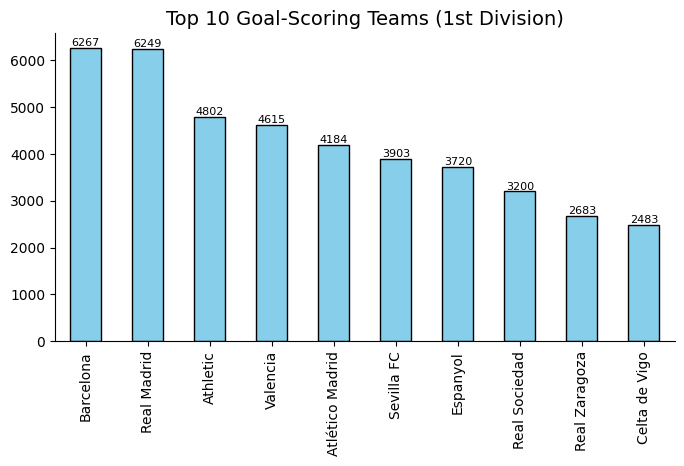

In [16]:
figure_1, axes_1 = plt.subplots(figsize=(8, 4))
TOP_total_goals.plot(kind='bar', ax=axes_1, color='skyblue', edgecolor='black')

plt.title('Top 10 Goal-Scoring Teams (1st Division)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

for i, v in enumerate(TOP_total_goals):
    axes_1.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=8)

axes_1.spines['top'].set_visible(False)
axes_1.spines['right'].set_visible(False)

plt.show()


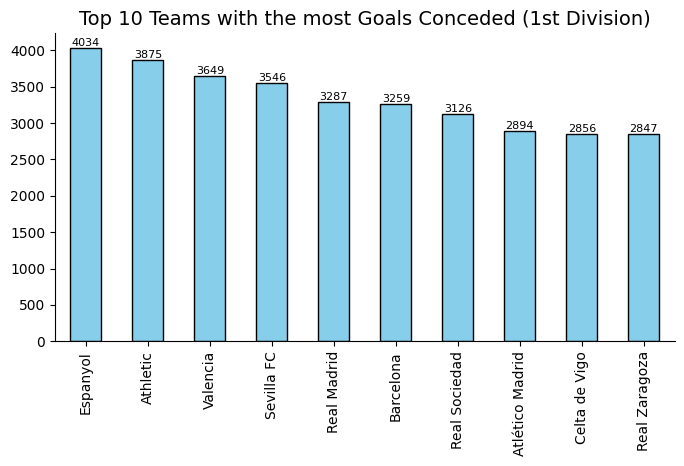

In [17]:
figure_2, axes_2 = plt.subplots(figsize=(8, 4))
TOP_total_goals_conceded.plot(kind='bar', ax=axes_2, color='skyblue', edgecolor='black')

plt.title('Top 10 Teams with the most Goals Conceded (1st Division)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

for i, v in enumerate(TOP_total_goals_conceded):
    axes_2.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=8)

axes_2.spines['top'].set_visible(False)
axes_2.spines['right'].set_visible(False)

plt.show()

In [18]:
df_clean['goal_difference'] = abs(df_clean['score_home'] - df_clean['score_visitor']).astype(int)
highest_goal_dif = df_clean[df_clean['division'] == 1].sort_values('goal_difference', ascending = False).head(10)
highest_goal_dif

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,result,goal_difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,12,1,Home,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,11,1,Home,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,10,0,Home,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,10,0,Home,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,10,0,Home,10
3629,1953-1954,1,26,3/28/54,None,Barcelona,Real Oviedo,9:0,9,0,Home,9
10024,1978-1979,1,16,1/14/79,None,Barcelona,Rayo Vallecano,9:0,9,0,Home,9
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,9,0,Home,9
5027,1959-1960,1,21,2/7/60,None,Real Madrid,Elche CF,11:2,11,2,Home,9
3911,1955-1956,1,1,9/11/55,None,Atlético Madrid,Hércules CF,9:0,9,0,Home,9


## Ejercicio 5

In [38]:
df_confrontations = df_clean[(df_clean['home_team'].isin(['Barcelona', 'Real Madrid'])) & (df_clean['away_team'].isin(['Barcelona', 'Real Madrid']))]

barcelona_wins = len(df_confrontations[(df_confrontations['home_team'] == 'Barcelona') & (df_confrontations['score_home'] > df_confrontations['score_visitor'])] +
                     df_confrontations[(df_confrontations['away_team'] == 'Barcelona') & (df_confrontations['score_home'] < df_confrontations['score_visitor'])])

real_madrid_wins = len(df_confrontations[(df_confrontations['home_team'] == 'Real Madrid') & (df_confrontations['score_home'] > df_confrontations['score_visitor'])] +
                       df_confrontations[(df_confrontations['away_team'] == 'Real Madrid') & (df_confrontations['score_home'] < df_confrontations['score_visitor'])])

barcelona_madrid_ties = len(df_confrontations[(df_confrontations['home_team'] == 'Barcelona') & (df_confrontations['score_home'] == df_confrontations['score_visitor'])] +
                     df_confrontations[(df_confrontations['away_team'] == 'Barcelona') & (df_confrontations['score_home'] == df_confrontations['score_visitor'])])


In [32]:
barcelona_goals = df_confrontations[(df_confrontations['home_team'] == 'Barcelona')]['score_home'].astype(int).sum() + df_confrontations[(df_confrontations['away_team'] == 'Barcelona')]['score_visitor'].astype(int).sum()
real_madrid_goals = df_confrontations[(df_confrontations['home_team'] == 'Real Madrid')]['score_home'].astype(int).sum() + df_confrontations[(df_confrontations['away_team'] == 'Real Madrid')]['score_visitor'].astype(int).sum()


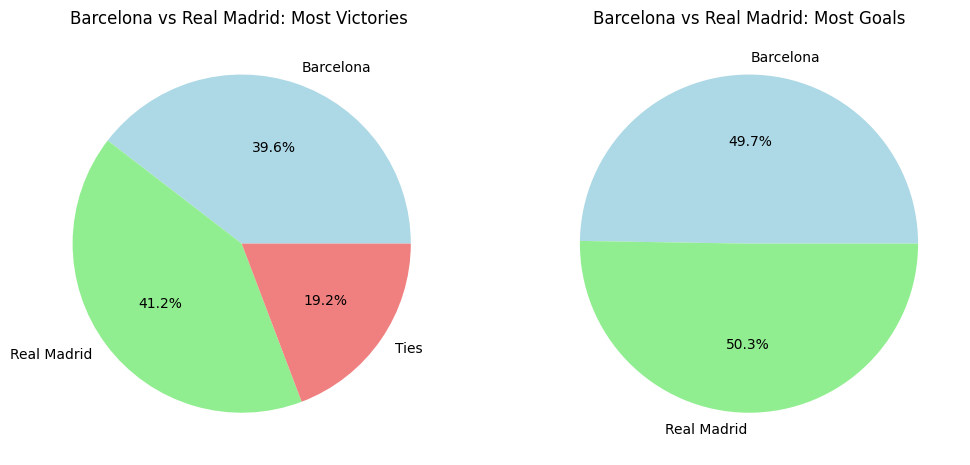

In [42]:
colors = ['lightblue', 'lightgreen', 'lightcoral']
figure_3, axes_3 = plt.subplots(1, 2, figsize=(12, 6))

axes_3[0].pie([barcelona_wins, real_madrid_wins, barcelona_madrid_ties], labels=['Barcelona', 'Real Madrid', 'Ties'], autopct='%1.1f%%', colors=colors)
axes_3[0].set_title('Barcelona vs Real Madrid: Most Victories ')

axes_3[1].pie([barcelona_goals, real_madrid_goals], labels=['Barcelona', 'Real Madrid'], autopct='%1.1f%%',colors=colors)
axes_3[1].set_title('Barcelona vs Real Madrid: Most Goals')

plt.show()


In [60]:
def plot_direct_confrontations_stats(team1, team2):
    df_confrontations = df_clean[(df_clean['home_team'].isin([team1, team2])) & (df_clean['away_team'].isin([team1, team2]))]

    team1_wins = len(df_confrontations[(df_confrontations['home_team'] == team1) & (df_confrontations['score_home'] > df_confrontations['score_visitor'])] +
                     df_confrontations[(df_confrontations['away_team'] == team1) & (df_confrontations['score_home'] < df_confrontations['score_visitor'])])
    team2_wins = len(df_confrontations[(df_confrontations['home_team'] == team2) & (df_confrontations['score_home'] > df_confrontations['score_visitor'])] +
                       df_confrontations[(df_confrontations['away_team'] == team2) & (df_confrontations['score_home'] < df_confrontations['score_visitor'])])
    team1_team2_ties = len(df_confrontations[(df_confrontations['home_team'] == team1) & (df_confrontations['score_home'] == df_confrontations['score_visitor'])] +
                     df_confrontations[(df_confrontations['away_team'] == team1) & (df_confrontations['score_home'] == df_confrontations['score_visitor'])])

    team1_goals = df_confrontations[(df_confrontations['home_team'] == team1)]['score_home'].astype(int).sum() + df_confrontations[(df_confrontations['away_team'] == team1)]['score_visitor'].astype(int).sum()
    team2_goals = df_confrontations[(df_confrontations['home_team'] == team2)]['score_home'].astype(int).sum() + df_confrontations[(df_confrontations['away_team'] == team2)]['score_visitor'].astype(int).sum()

    colors = ['lightblue', 'lightgreen', 'lightcoral']
    figure, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].pie([team1_wins, team2_wins, team1_team2_ties], labels=[team1, team2, 'Ties'], autopct='%1.1f%%', colors=colors)
    axes[0].set_title(team1 + ' vs ' + team2 + ': Most Victories')

    axes[1].pie([team1_goals, team2_goals], labels=[team1, team2], autopct='%1.1f%%', colors=colors)
    axes[1].set_title(team1 + ' vs ' + team2 + ': Most Goals')

    plt.show()
    return 


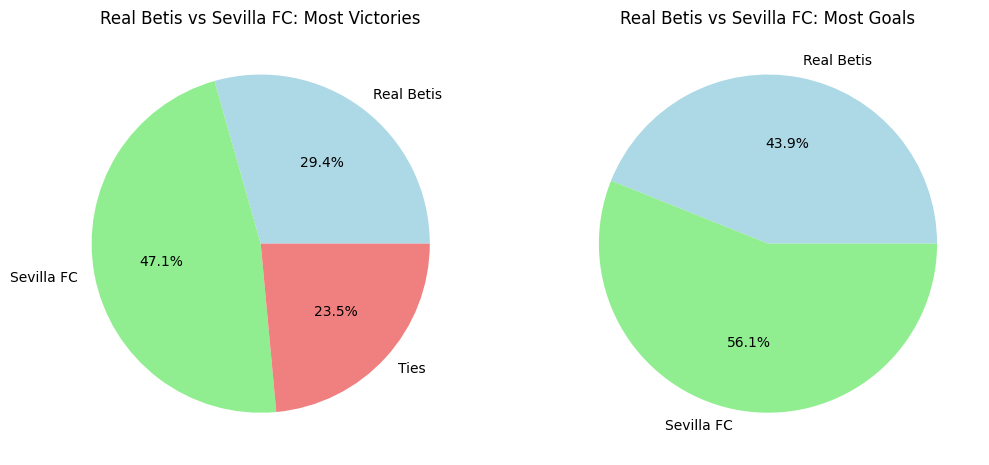

In [61]:
plot_direct_confrontations_stats('Real Betis', 'Sevilla FC')

## EJERCICIO 9

In [110]:
df_grouped = df_clean.groupby(['home_team', 'season'])['division'].first().reset_index()
df_grouped['division_change'] = df_grouped.groupby('home_team')['division'].diff().abs()

elevator_counts = df_grouped.groupby('home_team')['division_change'].sum()

TOP_5_elevator_teams = elevator_counts.sort_values(ascending=False).head(5).index.tolist()
TOP_5_elevator_teams

['Dep. La Coruña',
 'Racing',
 'Celta de Vigo',
 'Rayo Vallecano',
 'Real Valladolid']